# Лабораторная работа №8
## Вариант 7

In [1]:
from scipy import stats as sts
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import log2
import seaborn as sns
%matplotlib inline

## Задание

In [2]:
df = pd.read_csv("Lab_08/Вариант_7.csv", sep=';')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran Park Slope,House for sale,825000,2,2.000000,1820.000000,1666 73rd St,"Brooklyn, NY 11204","1666 73rd StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,73rd Street,"1666 73rd St, Brooklyn, NY 11204, USA",40.616317,-73.998165
1,Brokered by JOSK REALTY LLC,Multi-family home for sale,599999,6,2.000000,3490.000000,919 Crescent St,"Brooklyn, NY 11208","919 Crescent StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Crescent Street,"919 Crescent St., Brooklyn, NY 11208, USA",40.664930,-73.867072
2,Brokered by Corcoran East Side,Townhouse for sale,10999000,5,7.000000,2184.207862,132 W 81st St,"New York, NY 10024","132 W 81st StNew York, NY 10024",United States,New York,New York County,New York,West 81st Street,"132 W 81st St, New York, NY 10024, USA",40.783621,-73.975944
3,Brokered by TREBACH REALTY INC,House for sale,2750000,4,2.373861,2184.207862,4570 Delafield Ave,"Bronx, NY 10471","4570 Delafield AveBronx, NY 10471",United States,New York,Bronx County,The Bronx,Delafield Avenue,"4570 Delafield Ave, Bronx, NY 10471, USA",40.893055,-73.906742
4,Brokered by BHHS Fillmore R.E.,House for sale,649000,3,2.000000,1064.000000,2051 E 73rd St,"Brooklyn, NY 11234","2051 E 73rd StBrooklyn, NY 11234",United States,New York,Kings County,Brooklyn,East 73rd Street,"2051 E 73rd St, Brooklyn, NY 11234, USA",40.621503,-73.906637


In [3]:
print(f"""Размерность: {df.shape}
Есть пустые элементы: {True in df.isnull()}""")
df.info()

Размерность: (500, 17)
Есть пустые элементы: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  500 non-null    object 
 1   TYPE                         500 non-null    object 
 2   PRICE                        500 non-null    int64  
 3   BEDS                         500 non-null    int64  
 4   BATH                         500 non-null    float64
 5   PROPERTYSQFT                 500 non-null    float64
 6   ADDRESS                      500 non-null    object 
 7   STATE                        500 non-null    object 
 8   MAIN_ADDRESS                 500 non-null    object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  500 non-null    object 
 10  LOCALITY                     500 non-null    object 
 11  SUBLOCALITY                  500 non-null    object 
 12  STREET_NAME                

Колонка BATH имеет некорректный тип данных. Количество спален должно быть целым неотрицательным числом.

In [10]:
df["BATH"] = df["BATH"].apply(round)
print("Выборочный коэффициент асимметрии:")
features = ["BEDS",  "BATH",  "PROPERTYSQFT", "PRICE"]
df[features].skew()

Выборочный коэффициент асимметрии:


BEDS            2.630684
BATH            3.537474
PROPERTYSQFT    2.921334
PRICE           6.263753
dtype: float64

In [5]:
print("Выборочный коэффициент эксцесса:")
df[features].kurtosis()

Выборочный коэффициент эксцесса:


BEDS            13.349906
BATH            24.902507
PROPERTYSQFT    12.140569
PRICE           46.741105
dtype: float64

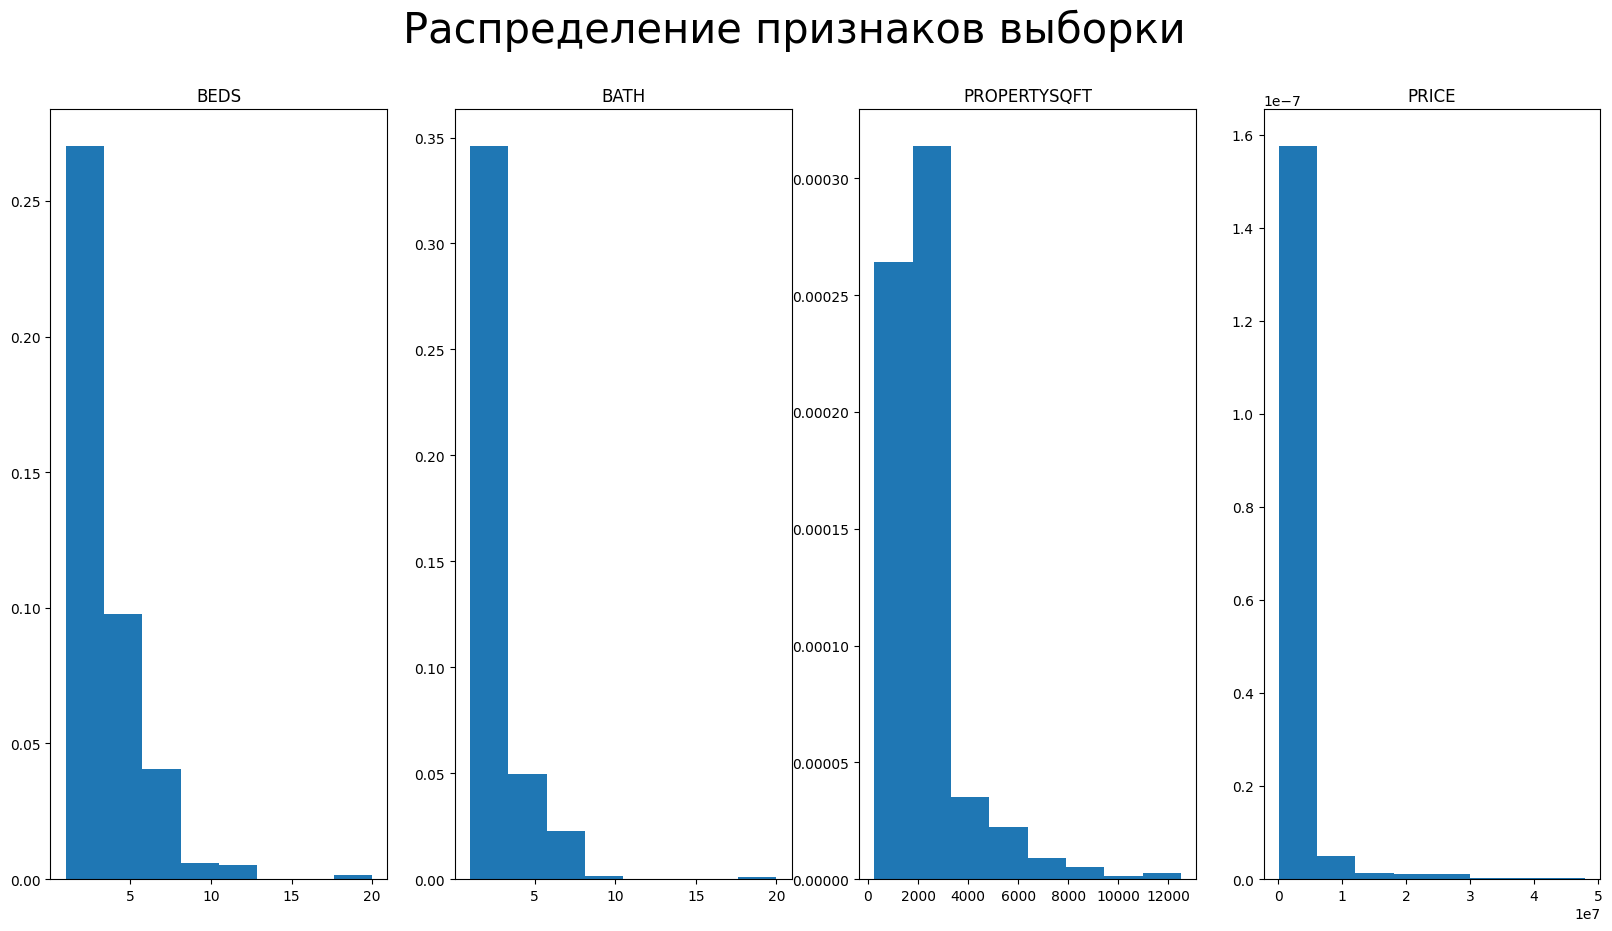

In [6]:
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(20, 10)
fig.suptitle('Распределение признаков выборки ', fontsize=30)

for i, column_name in enumerate(features):
    x = np.linspace(min(df[column_name]), max(df[column_name]), 1000)
    ax[i].hist(df[column_name], bins=int(log2(len(df[column_name]))), density=True)
    ax[i].set_title(column_name)

Наблюдается сильная положительная асимметрия, островершинное распределения каждого из исследуемых признаков. Положительное значение выборочного коэфиициента эксцесса указывает на наличие выбросов. Аномальных значений не наблюдается. Распределения резко отличаются от нормального.

C:\Users\J0hn_Lenin\AppData\Local\Temp\ipykernel_8084\1530302091.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name], kde=False, fit=sts.lognorm, ax=ax[i])


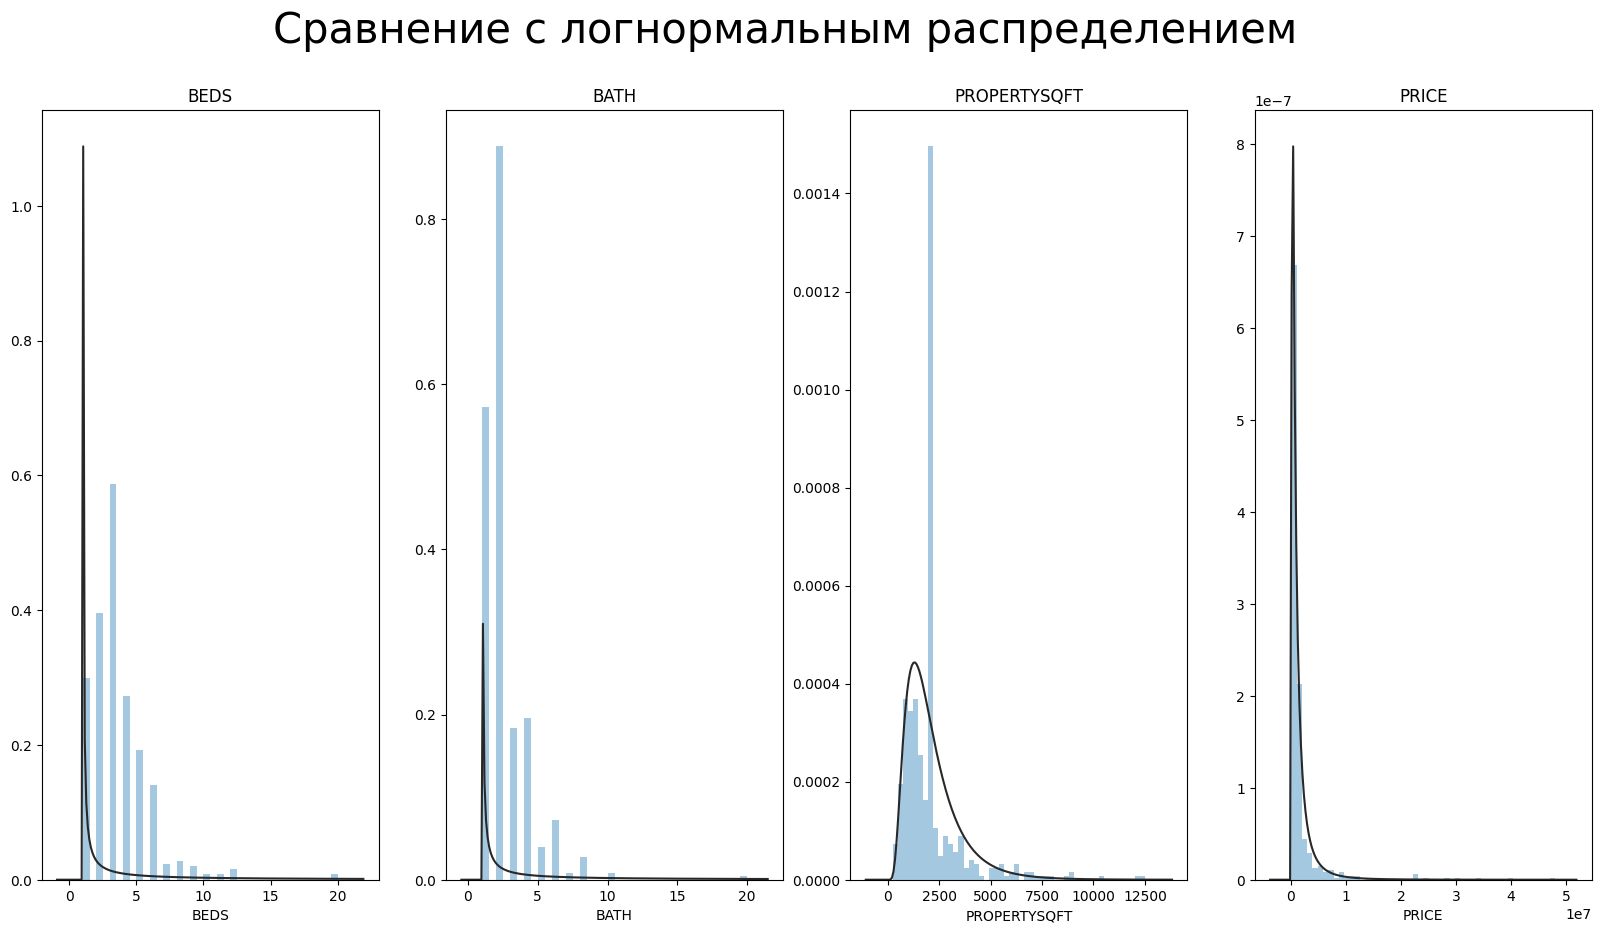

In [9]:
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(20, 10)
fig.suptitle('Сравнение с логнормальным распределением ', fontsize=30)
    
for i, column_name in enumerate(features):
    x = np.linspace(min(df[column_name]), max(df[column_name]), 1000)
    sns.distplot(df[column_name], kde=False, fit=sts.lognorm, ax=ax[i])
    ax[i].set_title(column_name)

Распределения BEDS и BATH резко отличаются от логнормального.
Распределения PROPERTYSQFT и PRICE близки к логнормальному

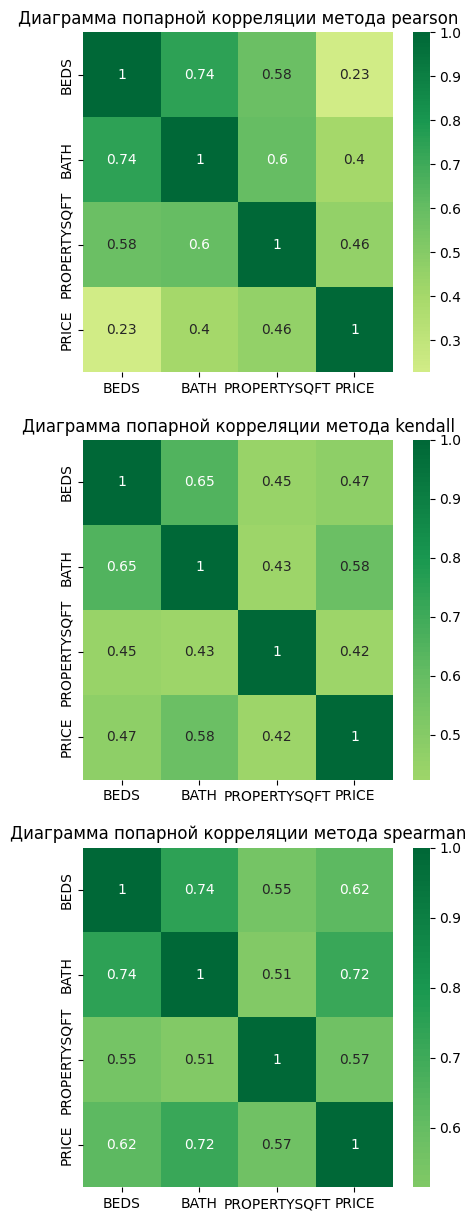

In [12]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(5, 15)
for i, met in enumerate(["pearson", "kendall", "spearman"]):
    
    cor = df[features].corr(method=met)
    sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, cmap='RdYlGn', center=0, annot=True, ax=ax[i])

    ax[i].set_title(f"Диаграмма попарной корреляции метода {met}")


Наличие выбросов предполагает использование ранговых коэффициентов корреляции. Наблюдается ковариация признаков.

Text(0.5, 1.0, 'Парные  графики  рассеяния')

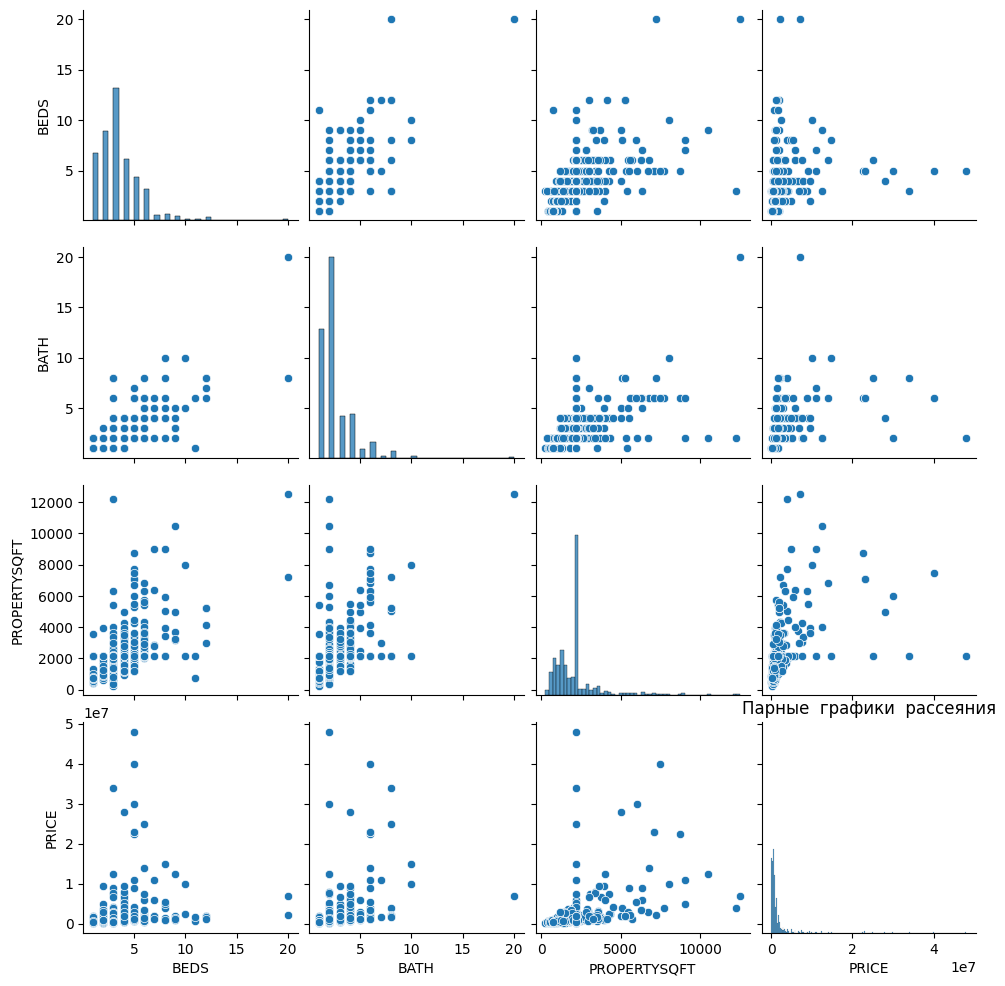

In [15]:
sns.pairplot(df[features])
plt.title("Парные  графики  рассеяния")

Признаки попарно зависимы